# Monthly Rain Reports


In [2]:
%load_ext autoreload
%autoreload 2

import logging
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import contextily as cx

from mergedownloader.inpeparser import INPE, INPEParsers, INPETypes
from mergedownloader.downloader import Downloader
from mergedownloader.utils import FileType
from mergedownloader.utils import GISUtil
from rainreporter.reporter import Reporter

import rasterio as rio
import xarray as xr


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Opening Basins of INterest

In [2]:
shapes_mac = Path('/Users/cordmaur/Library/CloudStorage/OneDrive-AgênciaNacionaldeÁguas/Trabalho/SOE/COVEC/Bases/bacias de interesse SOE')
shapes_container = Path('/workspaces/reports_folder/bases/bacias_interesse')

shapes = shapes_mac if shapes_mac.exists() else shapes_container
assert shapes.exists()

In [3]:
basins = {file.stem.split('_')[-1]: file for file in shapes.iterdir() if file.suffix == '.shp'}

In [4]:
basins

{'proj': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/Bacaia_Paranaiba_diss_proj.shp'),
 'ParaibaDoSul': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_ParaibaDoSul.shp'),
 'ANA': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacias_interesse_ANA.shp'),
 'Doce': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Doce.shp'),
 'wgs84': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Doce_wgs84.shp'),
 'Itapecuru': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Itapecuru.shp'),
 'Jequitinhonha': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Jequitinhonha.shp'),
 'Madeira': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Madeira.shp'),
 'PortoVelho': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Madeira_em_PortoVelho.shp'),
 'Negro': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Negro.shp'),
 'Paraguai': 

## Creating the Reporter Object

In [4]:
reporter = Reporter(
    server=INPEParsers.FTPurl, 
    download_folder='/workspaces/reports_folder/downloads', 
    log_level=logging.INFO,
    config_file='../reporter.json5'
)


../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


## Monthly Report

In [19]:
# specify report configurations
report_kwgs = {
    'shp': '/workspaces/reports_folder/bases/bacias_interesse/bacia_Doce.shp',
    'nome': "",
    'total_meses': 23,
    'inicio_periodo_chuvoso': 10,
}



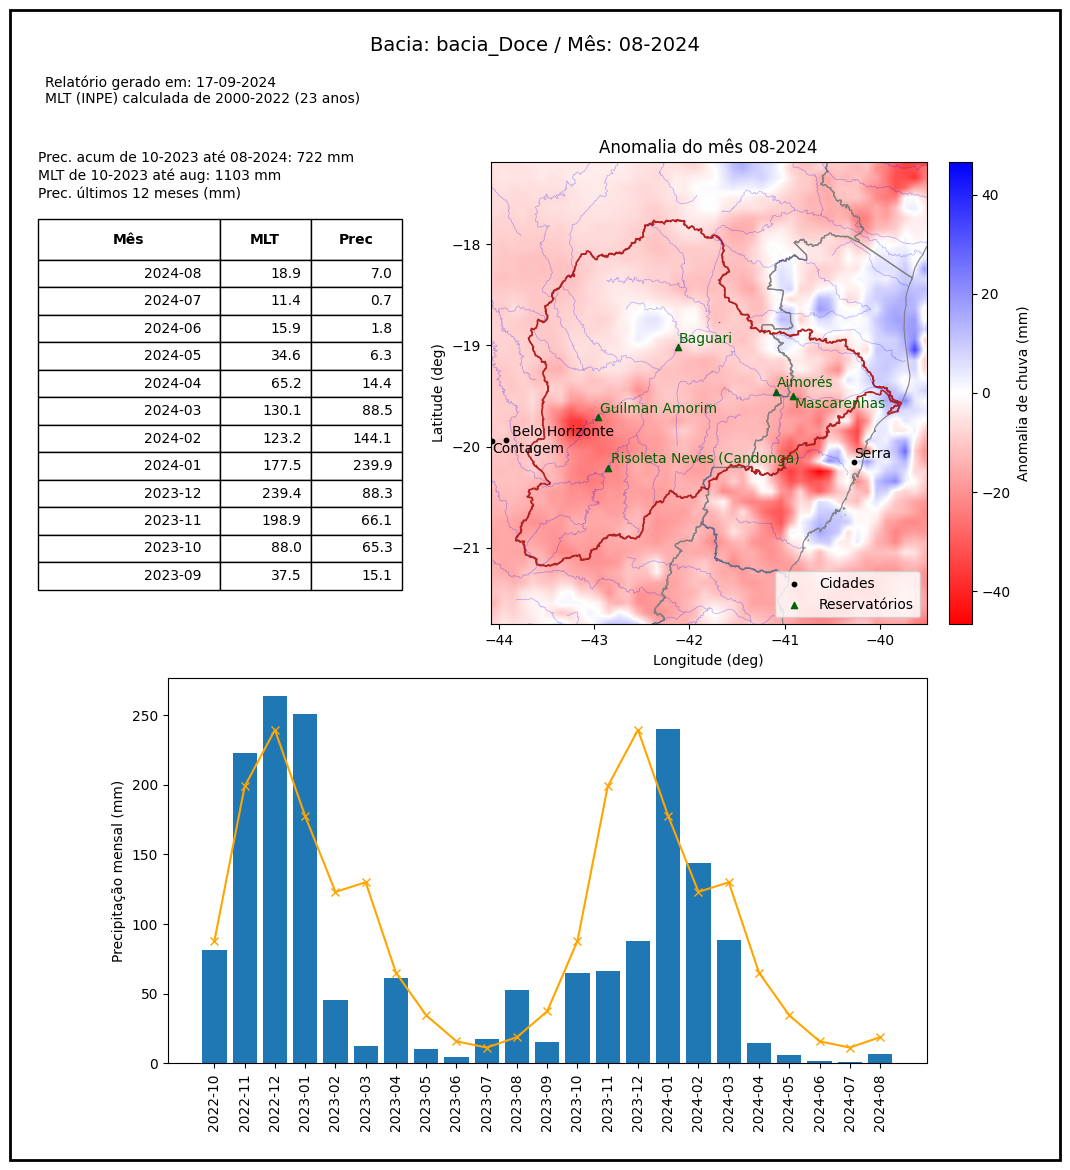

In [20]:
report = reporter.generate_report(rep_type='Mensal', date_str='2024-08', **report_kwgs)

In [17]:
fig, axs, rain_ts, lta_ts, shp = report

In [9]:
self = reporter
date = '2024-08'
# get the raster for the accumulated rain in the month
rain = self.downloader.create_cube(
    start_date=date, end_date=date, datatype=INPETypes.MONTHLY_ACCUM_MANUAL
).squeeze()

# get the rater for the long term average in the same month
lta = self.downloader.create_cube(
    start_date=date, end_date=date, datatype=INPETypes.MONTHLY_ACCUM
).squeeze()

In [10]:
rain.dims

('latitude', 'longitude')

In [11]:
lta.dims

('latitude', 'longitude')

In [12]:
rain2 = rain.rio.reproject_match(lta)
rain2

<xarray.DataArray 'monthacum' (y: 691, x: 551)>
array([[ 96.0625,  95.5   ,  93.3125, ...,  10.    ,  11.3125,   9.    ],
       [ 93.    ,  87.9375,  84.8125, ...,   7.25  ,   6.4375,   9.75  ],
       [ 90.5625,  89.125 ,  84.875 , ...,   8.4375,   9.875 ,   9.9375],
       ...,
       [247.375 , 268.125 , 254.125 , ...,  91.9375,  97.1875,  76.9375],
       [239.1875, 234.125 , 229.6875, ..., 106.875 , 109.1875,  98.    ],
       [225.1875, 241.0625, 232.0625, ..., 102.5   , 107.3125,  94.8125]],
      dtype=float32)
Coordinates:
  * x            (x) float64 -85.05 -84.95 -84.85 ... -30.25 -30.15 -30.05
  * y            (y) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
    surface      float64 2.55e+03
    step         timedelta64[ns] 00:00:00
    time         datetime64[ns] 2024-08-01T12:00:00
    spatial_ref  int64 0
Attributes:
    _FillValue:  3.402823466e+38

In [13]:
lta2 = lta.rio.reproject_match(rain)

In [14]:
lta2

<xarray.DataArray 'precacum' (y: 924, x: 1001)>
array([[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 3.4028235e+38,
        3.4028235e+38, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 3.4028235e+38,
        3.4028235e+38, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 3.4028235e+38,
        3.4028235e+38, 3.4028235e+38],
       ...,
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 3.4028235e+38,
        3.4028235e+38, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 3.4028235e+38,
        3.4028235e+38, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 3.4028235e+38,
        3.4028235e+38, 3.4028235e+38]], dtype=float32)
Coordinates:
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    time         datetime64[ns] 2023-08-01T12:00:00
    spatial_ref  int64 0
Attributes:
    _FillValue:  3.402823466e+38

In [17]:
anomaly = lta.copy()
anomaly.data = rain2.data - lta.data

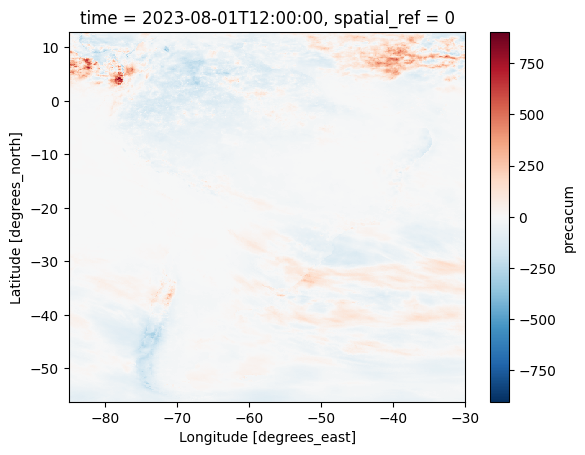

In [18]:
anomaly.plot()

In [60]:
rain.rio.bounds() == rain.rio.bounds()

True

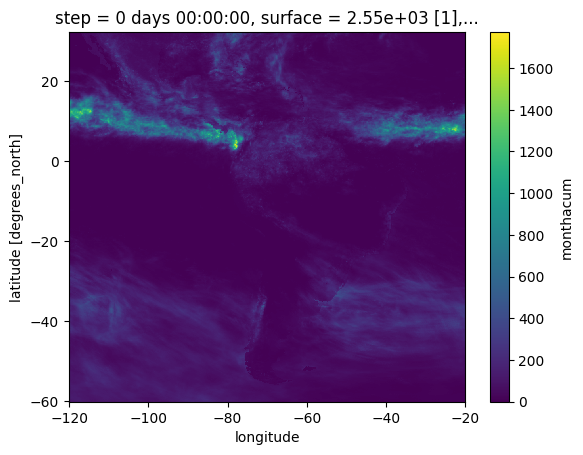

In [55]:
rain.plot()

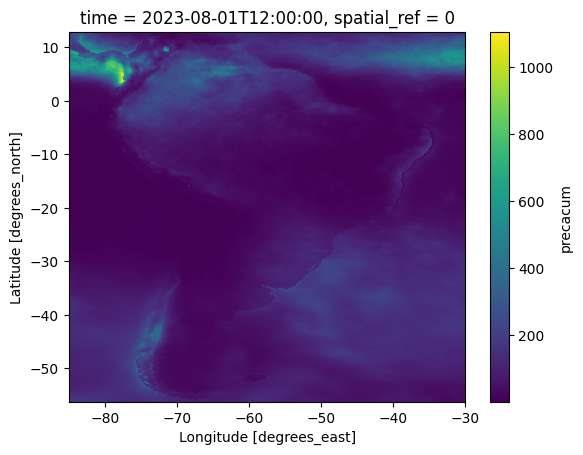

In [56]:
lta.plot()

In [50]:
rain

Signature: rain.__sub__(other)
Docstring: Same as a - b.
File:      /usr/local/lib/python3.10/dist-packages/xarray/core/_typed_ops.py
Type:      method

In [40]:
rain.shape

(924, 1001)

In [41]:
lta.shape

(691, 551)

In [42]:
rain.rio.reproject(dst_crs=lta.rio.crs, shape=lta.shape).shape

(691, 551)

In [26]:
rain

<xarray.DataArray 'monthacum' (y: 691, x: 551)>
array([[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.625 ,   0.125 ],
       [  0.    ,   0.    ,   0.    , ...,   0.125 ,   0.    ,   0.25  ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [109.5   , 107.125 , 105.9375, ...,   6.875 ,   7.4375,   7.375 ],
       [109.5   , 106.5   , 105.1875, ...,   6.375 ,   4.75  ,   5.6875],
       [ 37.75  , 108.125 , 103.1875, ...,   6.1875,   6.625 ,   6.5   ]],
      dtype=float32)
Coordinates:
  * x            (x) float64 -120.0 -119.8 -119.6 ... -20.45 -20.27 -20.09
  * y            (y) float64 32.23 32.1 31.97 31.83 ... -59.77 -59.9 -60.03
    surface      float64 2.55e+03
    time         datetime64[ns] 2024-08-01T12:00:00
    step         timedelta64[ns] 00:00:00
    spatial_ref  int64 0
Attributes:
    _FillValue:  3.402823466e+38

In [34]:
lta.dims

('latitude', 'longitude')

In [33]:
anomaly.dims

('y', 'x')

# Process Hot Folder

In [3]:
reporter = Reporter(
    server=INPEParsers.FTPurl, 
    download_folder='/workspaces/reports_folder/downloads', 
    log_level=logging.DEBUG,
    bases_folder='/workspaces/reports_folder/bases/',
    config_file='../reporter.json5'

    # parsers=INPEParsers.parsers,
    # post_processors=INPEParsers.post_processors
)


../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


In [ ]:

reporter.process_folder(
    input_folder='/workspaces/reports_folder/hot_folder/',
    output_folder='/workspaces/reports_folder/output/',
    hot=False
)

# Process Entire Folder

In [35]:
reporter = Reporter(
    server=INPEParsers.FTPurl, 
    download_folder='/workspaces/reports_folder/downloads', 
    log_level=logging.INFO,
    bases_folder='/workspaces/reports_folder/bases/',
    config_file='../reporter.json5'
    # parsers=INPEParsers.parsers,
    # post_processors=INPEParsers.post_processors
)

../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


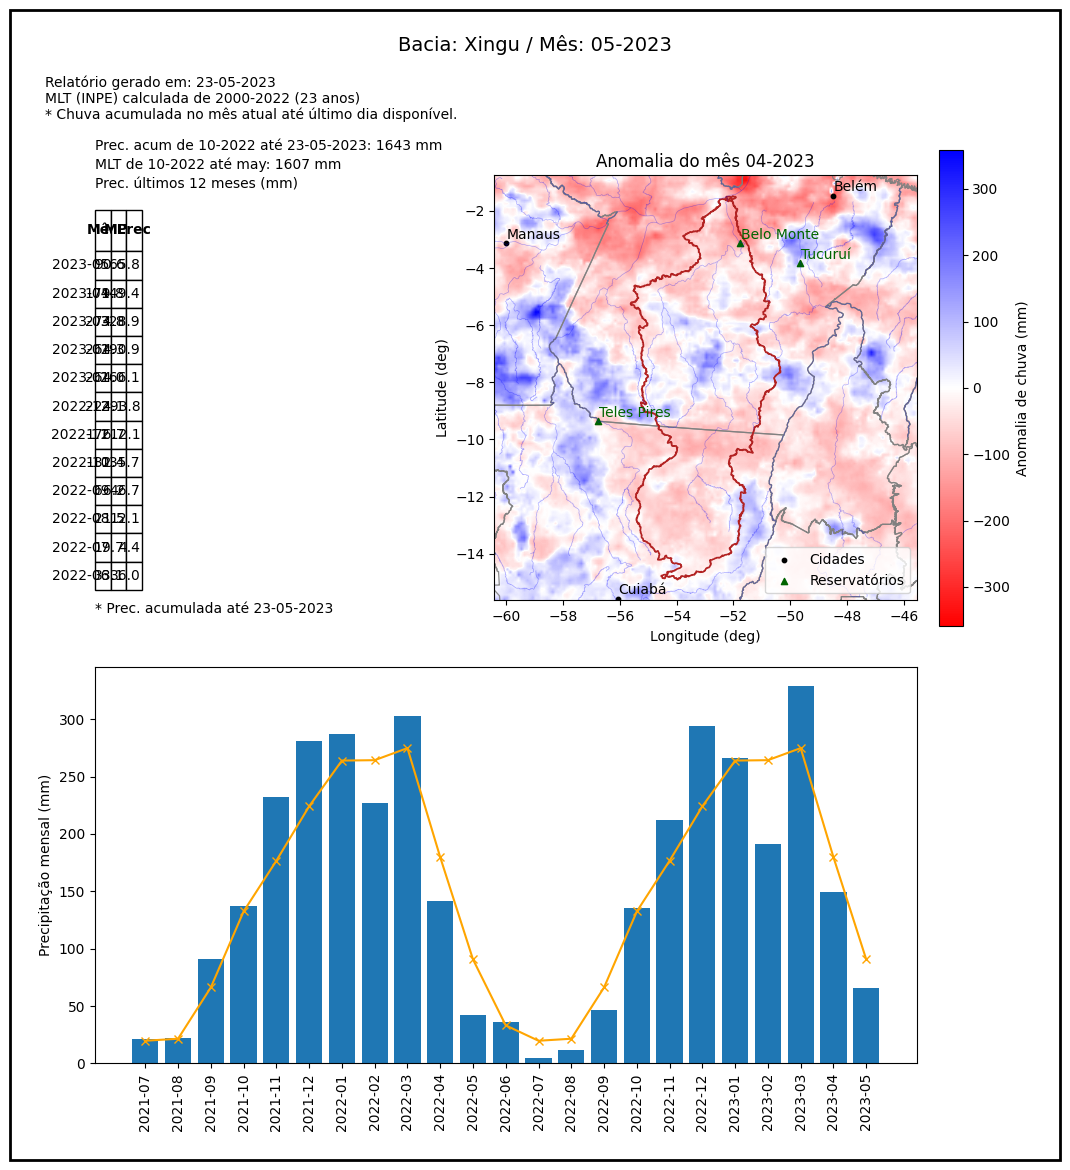

In [36]:
reporter.process_folder(
    input_folder='/workspaces/reports_folder/configs/',
    output_folder='/workspaces/reports_folder/output/'
)

In [3]:
shapes_container = Path('/workspaces/reports_folder/bases/BaciasIncrementais')
shapes_container.exists()


True

In [4]:
sf = shapes_container/'SaoFrancisco'

In [7]:
tres_marias = gpd.read_file(sf/'Incre_3_Marias_diss_proj.shp')

In [13]:
tres_marias

,Id,Nome,Area_km²,geometry
0,0,UHE Três Marias,57545.578138,"POLYGON ((-5052729.760 -2054701.559, -5052723...."


<Axes: >

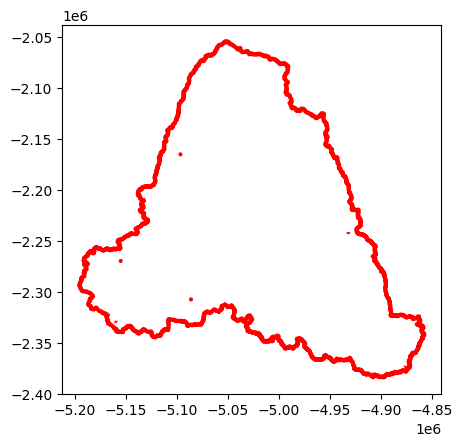

In [10]:
tres_marias.plot(facecolor='none', edgecolor= 'red', linewidth=3)

<Axes: >

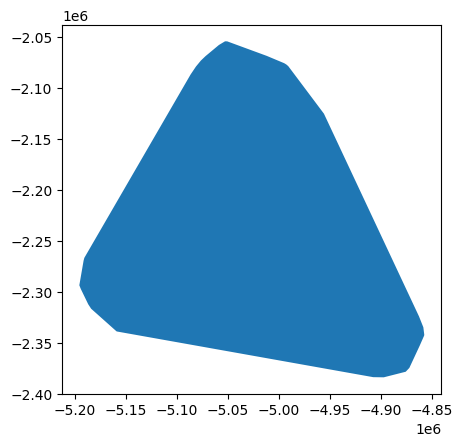

In [14]:
tres_marias.convex_hull.plot()

<Axes: >

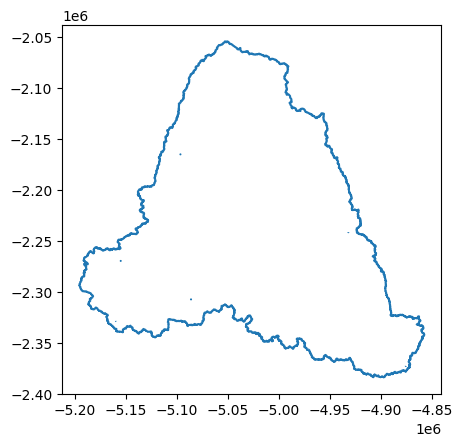

In [12]:
tres_marias.boundary.plot()